## Machine Learning

Now, we are done with both exploratory data analysis and preprocessing. Now we will go ahead with performing machine learning.

### Importing all packages

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.linear_model import *
from math import *
from sklearn.ensemble import *
from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.naive_bayes import *
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.neighbors import *
from sklearn.cluster import *
from sklearn.svm import *

### Importing all datasets

In [121]:
df_train = pd.read_csv("train_preprocessed.csv")
df_test = pd.read_csv("test_preprocessed.csv")

### Displaying first 5 elements of training dataset

In [122]:
df_train.head()

,PassengerId,HomePlanet_Europa,HomePlanet_Mars,Cabin Desk B,Cabin Desk C,Cabin Desk D,Cabin Desk E,Cabin Desk F,Cabin Desk G,Cabin Desk T,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,27.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,27.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,27.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,27.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,27.0,0,303.0,70.0,151.0,565.0,2.0,1


### Displaying first 5 elements of testing dataset

In [123]:
df_test.head()

,PassengerId,HomePlanet_Europa,HomePlanet_Mars,Cabin Desk B,Cabin Desk C,Cabin Desk D,Cabin Desk E,Cabin Desk F,Cabin Desk G,Cabin Desk T,...,CryoSleep,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0.0,1.0,26.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0.0,1.0,26.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,26.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,26.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0.0,1.0,26.0,0,10.0,0.0,635.0,0.0,0.0


### Length of training and testing datasets

In [124]:
print("Training length : ",len(df_train))
print("Testing length  : ",len(df_test))

Training length :  8122
Testing length  :  4017


In [125]:
print("Training percentage : ",round((len(df_train)*100/(len(df_train)+len(df_test))),2))
print("Testing percentage  : ",round((len(df_test)*100/(len(df_train)+len(df_test))),2))

Training percentage :  66.91
Testing percentage  :  33.09


### Splitting the training data into input and output

In [126]:
X_train = df_train.drop("Transported",axis=1,inplace=False)
y_train = df_train["Transported"]

X_test = df_test.copy()

In [168]:
lsvc = SVC()
model = lsvc.fit(X_train,y_train)

In [169]:
y_test = pd.Series(model.predict(X_test))

In [170]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
4012    0
4013    0
4014    0
4015    0
4016    0
Length: 4017, dtype: int64

In [171]:
v = round((y_test.value_counts()*100/y_test.value_counts().sum()),2)
v = v.reset_index()
v

,index,0
0,0,54.97
1,1,45.03


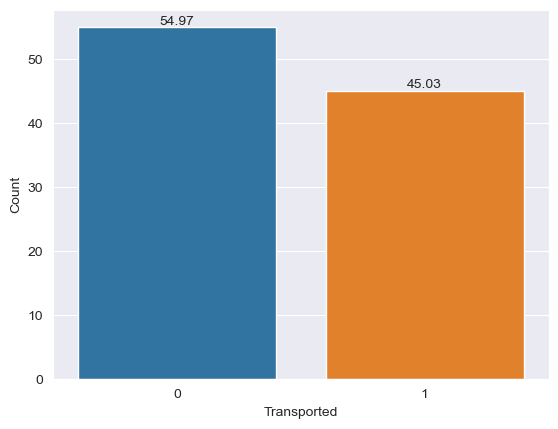

In [172]:
plot = sns.barplot(x=v["index"],y=v[0])
plot.set(ylabel="Count",xlabel="Transported")
for i in plot.containers:
    plot.bar_label(i,)

In [173]:
sub_df = pd.DataFrame(columns=["PassengerId","Transported"])
sub_df["PassengerId"] = df_test["PassengerId"]
sub_df["Transported"] = y_test

In [174]:
sub_df.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,0
3,0021_01,0
4,0023_01,0


In [175]:
sub_df.to_csv("amith_submission.csv",index=False)